Loading data from streaming and transfer directories...
Loaded 828 matrices from /tank/swlarsen/2024_11_07/fcc-ht2/hightouch_00000008_1730851555470406018_fnalfcc-ht2_04_00036.pcapng_matrices.npy
Loaded 1009 matrices from /tank/swlarsen/2024_11_07/fcc-ht2/hightouch_00000008_1730924092745278209_fnalfcc-ht2_02_00213.pcapng_matrices.npy
Loaded 670 matrices from /tank/swlarsen/2024_11_07/fcc-ht2/hightouch_00000008_1730855060555522778_fnalfcc-ht2_02_00084.pcapng_matrices.npy
Loaded 1226 matrices from /tank/swlarsen/2024_11_07/fcc-ht2/hightouch_00000008_1730919670884993896_fnalfcc-ht2_03_00153.pcapng_matrices.npy
Loaded 764 matrices from /tank/swlarsen/2024_11_07/fcc-ht2/hightouch_00000008_1730854143538250063_fnalfcc-ht2_01_00069.pcapng_matrices.npy
Loaded 13284 matrices from /tank/swlarsen/2024_10_18/fcc-ht2/run1/hightouch_00000008_1729292215364760883_fnalfcc-ht2_02_00107.pcapng_matrices.npy
Loaded 83226 matrices from /tank/swlarsen/2024_10_18/fcc-ht2/run1/hightouch_00000008_1729296183457781

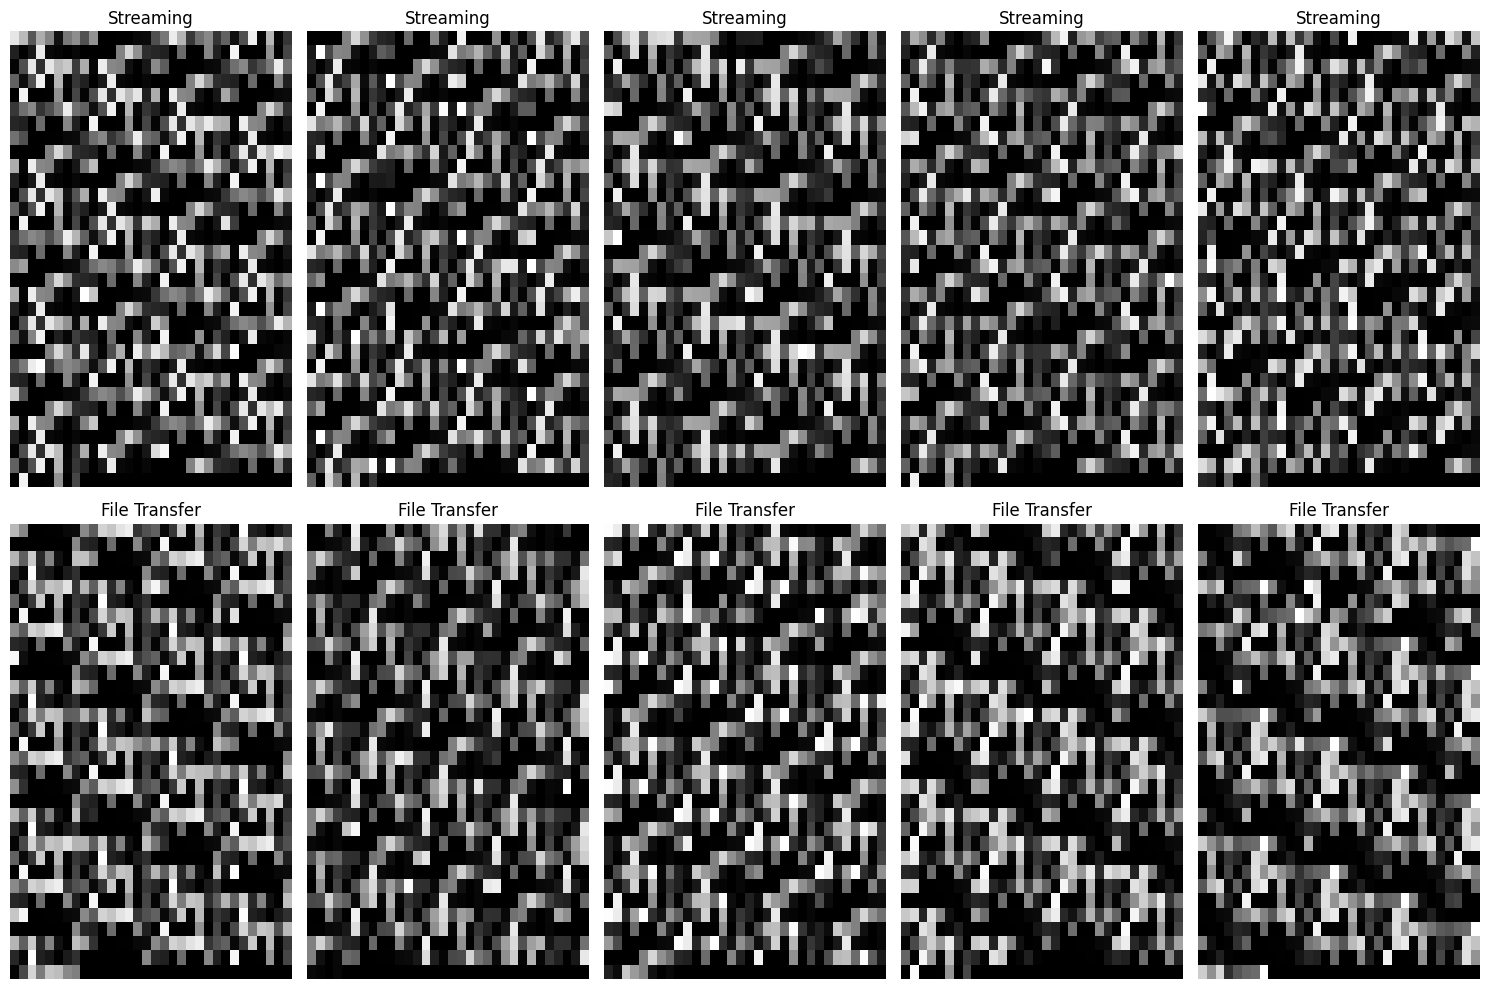

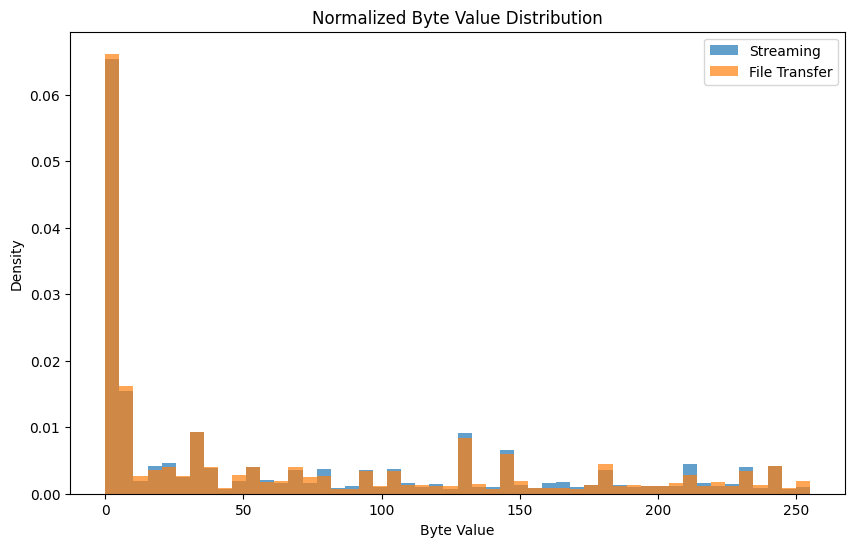

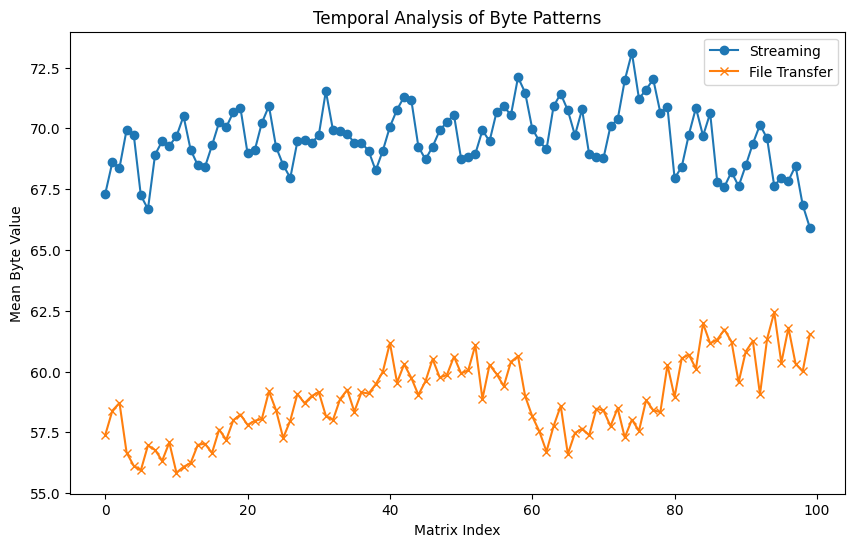

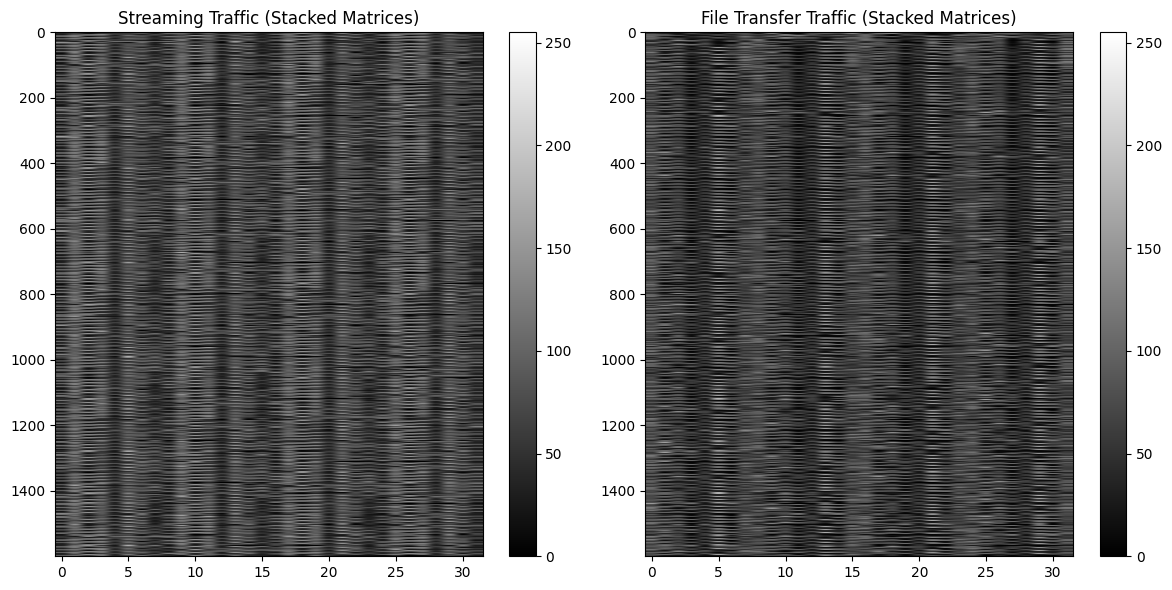

Computing entropy...
Plotting entropy...


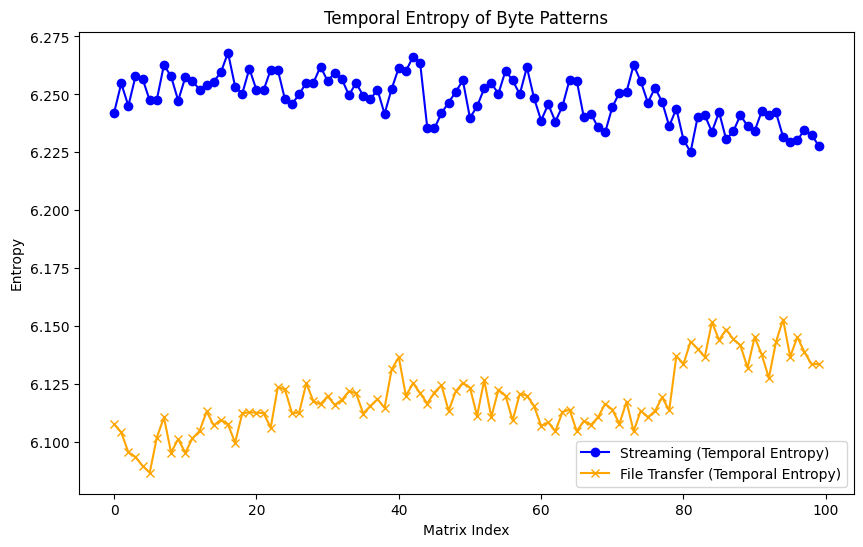

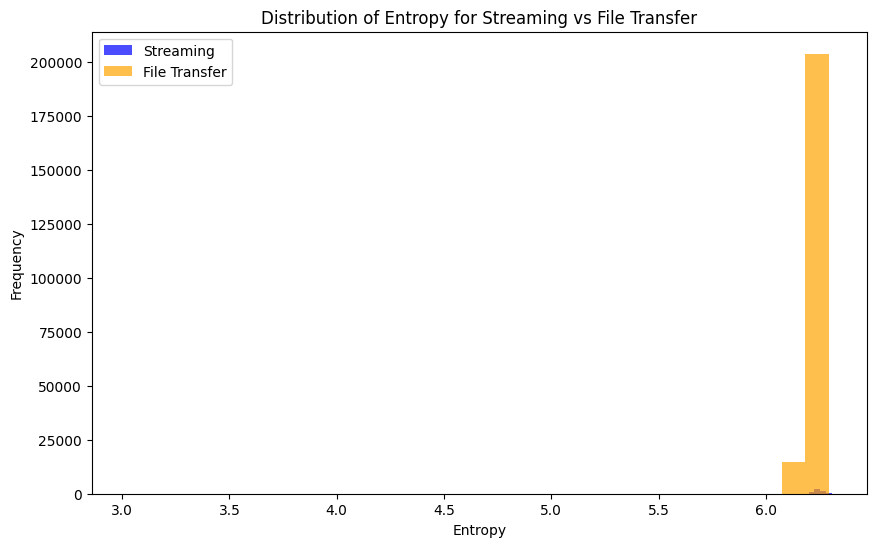

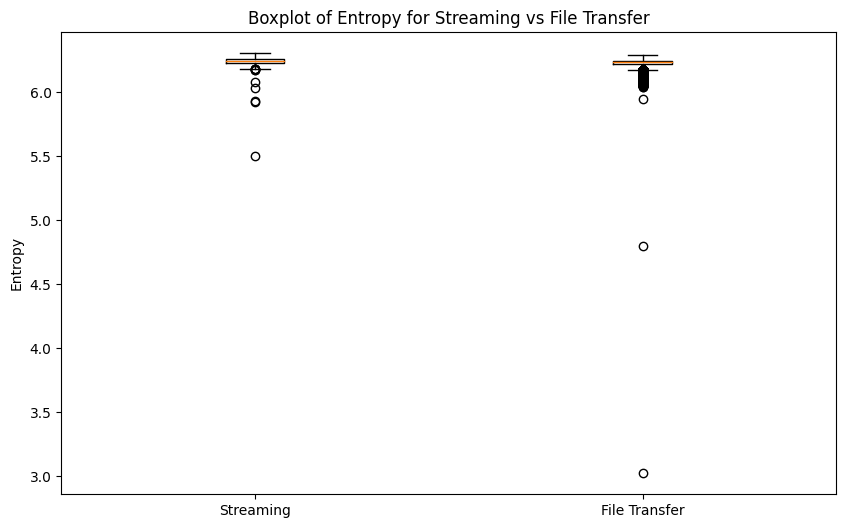

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import entropy


def load_and_label_data(streaming_dir, transfer_dir, n_files):
    
    streaming_data = []
    transfer_data = []
    
    streaming_files = [f for f in os.listdir(streaming_dir) if f.endswith('.npy')][:n_files]
    for file in streaming_files:
        file_path = os.path.join(streaming_dir, file)
        data = np.load(file_path)
        if data.ndim == 3 and data.shape[1:] == (32, 32):  # Ensure valid shape
            streaming_data.append(data)
            print(f"Loaded {data.shape[0]} matrices from {file_path}")
        else:
            print(f"Skipping {file_path}: Invalid shape {data.shape}")
    
    transfer_files = [f for f in os.listdir(transfer_dir) if f.endswith('.npy')][:n_files]
    for file in transfer_files:
        file_path = os.path.join(transfer_dir, file)
        data = np.load(file_path)
        if data.ndim == 3 and data.shape[1:] == (32, 32):  # Ensure valid shape
            transfer_data.append(data)
            print(f"Loaded {data.shape[0]} matrices from {file_path}")
        else:
            print(f"Skipping {file_path}: Invalid shape {data.shape}")
    
    streaming_data = np.vstack(streaming_data)
    transfer_data = np.vstack(transfer_data)
    print(f"Combined streaming data shape: {streaming_data.shape}")
    print(f"Combined transfer data shape: {transfer_data.shape}")
    
    streaming_labels = np.zeros(len(streaming_data))  # Label 0 for streaming
    transfer_labels = np.ones(len(transfer_data))  # Label 1 for transfer
    
    X = np.vstack((streaming_data, transfer_data))  # Combine matrices
    y = np.concatenate((streaming_labels, transfer_labels))  # Combine labels
    
    print(f"Final data shape: {X.shape}")
    print(f"Final labels shape: {y.shape}")
    
    return X, y

def plot_normalized_histogram(data, label, bins=50, alpha=0.7):
    
    flattened_data = data.flatten()
    plt.hist(flattened_data, bins=bins, alpha=alpha, label=label, density=True)  # Normalize with `density=True`
    plt.xlabel("Byte Value")
    plt.ylabel("Density")
    plt.title("Normalized Byte Value Distribution")
    plt.legend()

def compute_entropy(matrices):
    """
    Compute the entropy for each matrix in the dataset.
    """
    return [entropy(matrix.flatten()) for matrix in matrices]

def plot_entropy(streaming_entropy, transfer_entropy):
    """
    Plot entropy for both streaming and file transfer traffic.
    """
    # Line Plot: Temporal Entropy Changes
    plt.figure(figsize=(10, 6))
    plt.plot(streaming_entropy[:100], label="Streaming (Temporal Entropy)", marker='o', color='blue')
    plt.plot(transfer_entropy[:100], label="File Transfer (Temporal Entropy)", marker='x', color='orange')
    plt.xlabel("Matrix Index")
    plt.ylabel("Entropy")
    plt.title("Temporal Entropy of Byte Patterns")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(streaming_entropy, bins=30, alpha=0.7, label="Streaming", color='blue')
    plt.hist(transfer_entropy, bins=30, alpha=0.7, label="File Transfer", color='orange')
    plt.xlabel("Entropy")
    plt.ylabel("Frequency")
    plt.title("Distribution of Entropy for Streaming vs File Transfer")
    plt.legend()
    plt.show()

    # Boxplot: Range and Distribution of Entropy
    plt.figure(figsize=(10, 6))
    plt.boxplot([streaming_entropy, transfer_entropy], labels=["Streaming", "File Transfer"])
    plt.ylabel("Entropy")
    plt.title("Boxplot of Entropy for Streaming vs File Transfer")
    plt.show()


def visualize_samples_from_both(streaming_data, transfer_data, num_samples=10):
   
    plt.figure(figsize=(15, 10))

    streaming_indices = random.sample(range(len(streaming_data)), min(num_samples, len(streaming_data)))
    transfer_indices = random.sample(range(len(transfer_data)), min(num_samples, len(transfer_data)))

    for i, idx in enumerate(streaming_indices):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(streaming_data[idx], cmap='gray', aspect='auto')
        plt.title("Streaming")
        plt.axis('off')

    # Visualize transfer samples
    for i, idx in enumerate(transfer_indices):
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(transfer_data[idx], cmap='gray', aspect='auto')
        plt.title("File Transfer")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Directories for streaming and transfer matrices
    streaming_dir = "/tank/swlarsen/2024_11_07/fcc-ht2"  # Replace with your actual path
    transfer_dir = "/tank/swlarsen/2024_10_18/fcc-ht2/run1"  # Replace with your actual path

    # Number of files to load from each directory
    n_files = 5

    # Load and label data
    print("Loading data from streaming and transfer directories...")
    X, y = load_and_label_data(streaming_dir, transfer_dir, n_files)

    print("Visualizing samples from both datasets...")
    visualize_samples_from_both(X[y == 0], X[y == 1], num_samples=5)
    plt.figure(figsize=(10, 6))
    plot_normalized_histogram(X[y == 0], "Streaming", bins=50)
    plot_normalized_histogram(X[y == 1], "File Transfer", bins=50)
    plt.show()
    # Flatten matrices for logistic regression
#    X_flat = X.reshape(X.shape[0], -1)

    # Train-test split
#    X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
#    clf = LogisticRegression(max_iter=1000)
#    clf.fit(X_train, y_train)

    # Evaluate the model
#    y_pred = clf.predict(X_test)
#    print(classification_report(y_test, y_pred))
#    streaming_means = [np.mean(matrix) for matrix in X[y == 0][:100]]
#    transfer_means = [np.mean(matrix) for matrix in X[y == 1][:100]]

    # Plot temporal changes
    streaming_means = [np.mean(matrix) for matrix in X[y == 0][:100]]
    transfer_means = [np.mean(matrix) for matrix in X[y == 1][:100]]
    plt.figure(figsize=(10, 6))
    plt.plot(streaming_means, label="Streaming", marker='o')
    plt.plot(transfer_means, label="File Transfer", marker='x')
    plt.xlabel("Matrix Index")
    plt.ylabel("Mean Byte Value")
    plt.title("Temporal Analysis of Byte Patterns")
    plt.legend()
    plt.show()
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(np.vstack(X[y == 0][:50]), cmap='gray', aspect='auto')
    plt.title("Streaming Traffic (Stacked Matrices)")
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(np.vstack(X[y == 1][:50]), cmap='gray', aspect='auto')
    plt.title("File Transfer Traffic (Stacked Matrices)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()
    
    print("Computing entropy...")
    streaming_entropy = compute_entropy(X[y == 0])
    transfer_entropy = compute_entropy(X[y == 1])

    print("Plotting entropy...")
    plot_entropy(streaming_entropy, transfer_entropy)